import libraries

In [1]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import seaborn as sns

# import data
## Generations

In [2]:
df_grid = pd.read_csv('generation-grid.csv')
df_grid = df_grid.rename(columns=lambda x: re.sub('\ufeff', '', x)) # remove blank spaces
df_grid.head()

,Substation Name,Nominal Voltage (kV),Grid Group,Supergrid Group,Firm Capacity (MVA),Maximum Load (MVA),Minimum Load (MVA),Generation Connected (MW),Generation Contracted (MW),Overall Category,132kV Generation Capacity,33kV Fault Level,Wider Constraint Category,Wider Constraint,District,X,Y
0,AINTREE,132/33,AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,KIRKBY,101.9,76.7,19.2,6.1,16.0,RED,Green,Green,Red,NaN,Merseyside,337138.3940,399769.6970
1,FORMBY,132/33,AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,KIRKBY,101.9,76.7,19.2,6.1,16.0,RED,Green,Green,Red,NaN,Merseyside,330979.9800,406990.7280
2,LISTER DRIVE,132/33,BOOTLE GT2A / BURLINGTON ST GT1 / LISTER DV A GT2,LISTER DRIVE,138.1,85.6,21.4,5.4,20.4,AMBER,Green,Red,Amber,NaN,Merseyside,338447.3411,391747.9437
3,LEGACY,132/33,BRYMBO GT1 / LEGACY LOCAL GT1 / MARCHWIEL GT1 ...,LEGACY,154.7,119.7,29.9,28.9,48.0,RED,Green,Green,Red,NaN,Dee Valley & Mid Wales,329112.9340,347936.9270
4,WARRINGTON,132/33,DALLAM GT1 / SANKEY BRIDGES GT1 / WARRINGTON GT3,CARRINGTON - FIDDLERS FERRY,103.0,92.7,23.2,11.2,5.4,RED,Green,Green,Red,NaN,Mid Cheshire,362284.6170,388088.3560


In [3]:
df_pri = pd.read_csv('generation-primary.csv')
df_pri = df_pri.rename(columns=lambda x: re.sub('\ufeff', '', x))
df_pri.head()

,Substation Name,Nominal Voltage (kV),Primary Group,Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Minimum Load (MVA),Generation Connected (MW),Generation Contracted (MW),33kV Overall Category,Overall Category,33kV Generation Capacity,33kV Wider Constraints,HV Reverse Power Flow,HV Generation Capacity,HV Fault Level,HV Wider Constraints,District,X,Y
0,NORTH ROAD,33/11,ABERYSTWYTH T1 / NORTH RD T1 / PARC-Y-LLYN T1 ...,ABERYSTWYTH GT2 / RHYDLYDAN GT1,37.5,18.55,4.64,0.02,0.0,RED,RED,Red,Red,Amber,Green,Red,Amber,Dee Valley & Mid Wales,258666.8910,281901.4070
1,DICKINSONS,33/11,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,30.0,14.71,3.68,0.04,0.0,RED,RED,Green,Red,Amber,Green,Red,Amber,Merseyside,342713.8240,398255.2320
2,WAVERTREE,33/11,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,GARSTON GT2 / SPEKE GT3 / WAVERTREE GT1A,37.5,18.97,4.74,0.00,0.0,AMBER,RED,Green,Amber,Amber,Green,Red,Amber,Merseyside,339018.8312,388483.6650
3,AINTREE,33/11,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2,20.0,11.67,2.92,0.00,0.0,RED,AMBER,Green,Red,Amber,Amber,Amber,Amber,Merseyside,336740.4480,398306.6880
4,ANDERTON,33/11,ANDERTON T1,HARTFORD GT1 / LOSTOCK GT2 / WINSFORD GT1 / WI...,7.5,2.61,0.65,0.22,0.0,RED,RED,Green,Red,Red,Red,Green,Amber,Mid Cheshire,364880.5897,375727.2788


In [4]:
df_sup = pd.read_csv('generation-supergrid.csv')
df_sup = df_sup.rename(columns=lambda x: re.sub('\ufeff', '', x))
df_sup.head()

,Substation Name,Nominal Voltage (kV),Supergrid Group,Generation Connected (MW),Generation Contracted (MW),Overall Category,District,X,Y
0,CUERDLEY,275/132,CARRINGTON - FIDDLERS FERRY,319.86,201.82,RED,Merseyside,354276.1256,386149.3722
1,ST ASAPH,400/132,CONNAHS QUAY - PENTIR - ST ASAPH,399.18,470.42,RED,North Wales,302107.1498,374226.2423
2,TRAWSFYNYDD,275/132,TRAWSFYNYDD,114.92,5.11,AMBER,North Wales,268965.1300,338612.7790
3,BIRKENHEAD,275/132,BIRKENHEAD,147.16,279.62,RED,Wirral,329447.9271,386080.0892
4,FRODSHAM,275/132,FRODSHAM - INCE,305.61,1264.77,RED,Wirral,352273.0660,379450.7070


In [5]:
df_pri_m = df_pri[df_pri['District'] == 'Merseyside']
df_pri_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 650
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             228 non-null    object 
 1   Nominal Voltage (kV)        228 non-null    object 
 2   Primary Group               228 non-null    object 
 3   Grid Group                  228 non-null    object 
 4   Firm Capacity (MVA)         228 non-null    float64
 5   Maximum Load (MVA)          228 non-null    float64
 6   Minimum Load (MVA)          228 non-null    float64
 7   Generation Connected (MW)   228 non-null    float64
 8   Generation Contracted (MW)  228 non-null    float64
 9   33kV Overall Category       228 non-null    object 
 10  Overall Category            228 non-null    object 
 11  33kV Generation Capacity    228 non-null    object 
 12  33kV Wider Constraints      228 non-null    object 
 13  HV Reverse Power Flow       228 non

In [6]:
df_grid_m = df_grid[df_grid['District'] == 'Merseyside']
df_grid_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 102
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             39 non-null     object 
 1   Nominal Voltage (kV)        39 non-null     object 
 2   Grid Group                  39 non-null     object 
 3   Supergrid Group             39 non-null     object 
 4   Firm Capacity (MVA)         39 non-null     float64
 5   Maximum Load (MVA)          39 non-null     float64
 6   Minimum Load (MVA)          39 non-null     float64
 7   Generation Connected (MW)   39 non-null     float64
 8   Generation Contracted (MW)  39 non-null     float64
 9   Overall Category            39 non-null     object 
 10  132kV Generation Capacity   39 non-null     object 
 11  33kV Fault Level            39 non-null     object 
 12  Wider Constraint Category   39 non-null     object 
 13  Wider Constraint            0 non-nu

In [7]:
df_sup_m = df_sup[df_sup['District'] == 'Merseyside']
df_sup_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 13
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             4 non-null      object 
 1   Nominal Voltage (kV)        4 non-null      object 
 2   Supergrid Group             4 non-null      object 
 3   Generation Connected (MW)   4 non-null      float64
 4   Generation Contracted (MW)  4 non-null      float64
 5   Overall Category            4 non-null      object 
 6   District                    4 non-null      object 
 7   X                           4 non-null      float64
 8   Y                           4 non-null      float64
dtypes: float64(4), object(5)
memory usage: 320.0+ bytes


In [55]:
df_pri_m.groupby('Firm Capacity (MVA)')['Substation Name'].count()

TypeError: Could not convert HASKAYNE to numeric

In [43]:
df_pri_m.groupby('Nominal Voltage (kV)')['Substation Name'].count()

Nominal Voltage (kV)
33/11     170
33/6.3     39
33/6.6     19
Name: Substation Name, dtype: int64

In [52]:
df_pri_m.groupby('Overall Category')[['Maximum Load (MVA)', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg(['count', 'sum', 'mean', 'max', 'min'])

Maximum Load (MVA)                                   \
                              count      sum       mean    max   min   
Overall Category                                                       
AMBER                            29   260.65   8.987931  16.20  4.26   
RED                             199  2763.43  13.886583  24.89  0.43   

                 Generation Connected (MW)                              \
                                     count     sum      mean  max  min   
Overall Category                                                         
AMBER                                   29    0.00  0.000000  0.0  0.0   
RED                                    199  164.69  0.827588  4.6  0.0   

                 Generation Contracted (MW)                             
                                      count    sum      mean  max  min  
Overall Category                                                        
AMBER                                    29   0.00  0.000000  0.0  0.0  
RED                                     199  13.84  0.069548  3.0  0.0

In [47]:
df_grid_m.groupby('Overall Category')[['Maximum Load (MVA)', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg(['count', 'sum', 'mean'])

Maximum Load (MVA)                     \
                              count     sum       mean   
Overall Category                                         
AMBER                            11   895.1  81.372727   
RED                              28  1619.3  57.832143   

                 Generation Connected (MW)                    \
                                     count    sum       mean   
Overall Category                                               
AMBER                                   11  147.7  13.427273   
RED                                     28  551.4  19.692857   

                 Generation Contracted (MW)                    
                                      count    sum       mean  
Overall Category                                               
AMBER                                    11  119.6  10.872727  
RED                                      28  231.4   8.264286

In [10]:
df_sup_m.groupby('Overall Category')[['Generation Connected (MW)', 'Generation Contracted (MW)']].agg(['count', 'sum'])

Generation Connected (MW)         Generation Contracted (MW)  \
                                     count     sum                      count   
Overall Category                                                                
AMBER                                    1   54.16                          1   
RED                                      3  604.56                          3   

                          
                     sum  
Overall Category          
AMBER              49.60  
RED               496.57

In [38]:
df_sub = pd.concat([df_pri_m[['Substation Name', 'Grid Group', 'Firm Capacity (MVA)', 'Maximum Load (MVA)', 'Overall Category', 'X', 'Y']], df_grid_m[['Substation Name', 'Grid Group', 'Firm Capacity (MVA)', 'Maximum Load (MVA)', 'Overall Category', 'X', 'Y']]], ignore_index=True)
df_sub.head()

,Substation Name,Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Overall Category,X,Y
0,DICKINSONS,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,30.0,14.71,RED,342713.8240,398255.232
1,WAVERTREE,GARSTON GT2 / SPEKE GT3 / WAVERTREE GT1A,37.5,18.97,RED,339018.8312,388483.665
2,AINTREE,AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2,20.0,11.67,AMBER,336740.4480,398306.688
3,WAVERTREE VALE,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,17.5,10.12,RED,337981.9520,389512.576
4,LARK LANE,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,30.0,20.86,RED,337278.9120,387620.384


### convert bng to lat long

In [39]:
import pyproj

transformer = pyproj.Transformer.from_crs("EPSG:27700", "EPSG:4326")

# df_pri_m['long'] = df_pri_m['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
# df_pri_m['lat'] = df_pri_m['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

# df_grid_m['long'] = df_grid_m['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
# df_grid_m['lat'] = df_grid_m['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

# df_sup_m['long'] = df_sup_m['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
# df_sup_m['lat'] = df_sup_m['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

df_sub['long'] = df_sub['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
df_sub['lat'] = df_sub['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

### plot map

In [41]:
import plotly.express as px

fig = px.density_mapbox(df_sub.replace({'RED':2, 'AMBER':1}), lat='lat', lon='long', z='Overall Category', radius=10,
                        center=dict(lat=53.5, lon=-2.9), zoom=8, hover_name='Substation Name',
                        mapbox_style="open-street-map")
fig.show()

## flows

In [14]:
df_flow = pd.read_parquet('flow.parquet')
df_flow.head()

,timestamp,time_zone_offset,net_mw,net_amps,net_mvar,filter_mw,filter_amp,filter_mvar,filtered_manual_int,generation_output_mw,underlying_demand_mw,group_id,service_area,district,group_name,voltage
0,2023-12-30 05:30:00,0,4.410,0.0,0.609,NaN,NaN,NaN,None,0.0,4.410,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
1,2023-12-30 06:00:00,0,4.398,0.0,0.609,NaN,NaN,NaN,None,0.0,4.398,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
2,2023-12-30 06:30:00,0,4.323,0.0,0.149,NaN,NaN,NaN,None,0.0,4.323,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
3,2023-12-30 07:00:00,0,4.323,0.0,0.141,NaN,NaN,NaN,None,0.0,4.323,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
4,2023-12-30 07:30:00,0,4.481,0.0,0.117,NaN,NaN,NaN,None,0.0,4.481,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV


In [15]:
df_flow_m = df_flow.query('district == "Merseyside"')
df_flow_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623175 entries, 0 to 1623174
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   timestamp             1623175 non-null  datetime64[ns]
 1   time_zone_offset      1623175 non-null  int64         
 2   net_mw                1623175 non-null  float64       
 3   net_amps              1623175 non-null  float64       
 4   net_mvar              1623175 non-null  float64       
 5   filter_mw             216031 non-null   float64       
 6   filter_amp            216031 non-null   float64       
 7   filter_mvar           216031 non-null   float64       
 8   filtered_manual_int   107867 non-null   object        
 9   generation_output_mw  1623175 non-null  float64       
 10  underlying_demand_mw  1623175 non-null  float64       
 11  group_id              1623175 non-null  object        
 12  service_area          1623175 non-null  ob

# KPIs
recheck kpi sums with actual data

In [16]:
df_flow_m['date'] = pd.to_datetime(df_flow_m['timestamp'].dt.date)
df_flow_m['time'] = df_flow_m['timestamp'].dt.time

## hourly

In [17]:
df_flow_hr = df_flow_m.groupby('time')['net_mw'].mean().reset_index()
df_flow_hr

,time,net_mw
0,00:00:00,13.509179
1,00:30:00,13.041242
2,01:00:00,12.480051
3,01:30:00,12.183608
4,02:00:00,11.848141
5,02:30:00,11.648733
6,03:00:00,11.344038
7,03:30:00,11.011296
8,04:00:00,10.240930
9,04:30:00,10.758778


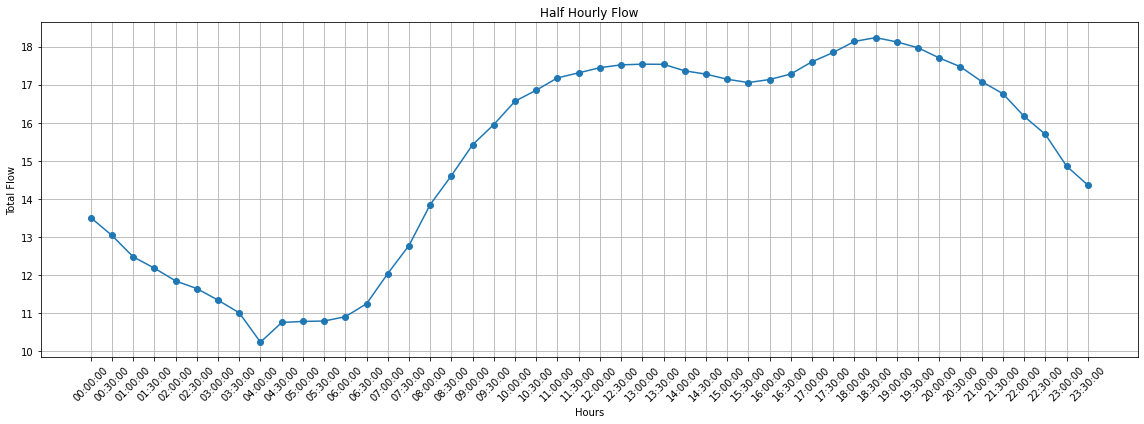

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))  # Set plot size
plt.plot(df_flow_hr['time'].astype('str'), df_flow_hr['net_mw'], marker='o')
plt.xlabel('Hours')
plt.ylabel('Total Flow')
plt.title('Half Hourly Flow')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

## Peak Demands

In [19]:
df_flow_dm = df_flow_m.groupby('date')['underlying_demand_mw'].agg(['max','min']).reset_index()
df_flow_dm

,date,max,min
0,2023-09-01,230.777,0.000
1,2023-09-02,213.173,0.000
2,2023-09-03,225.336,0.000
3,2023-09-04,240.286,0.000
4,2023-09-05,251.199,0.000
...,...,...,...
369,2024-09-04,240.851,0.000
370,2024-09-05,237.311,0.000
371,2024-09-06,224.345,0.000
372,2024-09-07,206.432,0.000


In [20]:
df_flow_dl = df_flow_m.groupby('date')['net_mw'].sum().reset_index()
df_flow_dl['day'] = df_flow_dl['date'].dt.day_name()
df_flow_dl = df_flow_dl.groupby('day').mean().reset_index()
df_flow_dl

,day,net_mw
0,Friday,66213.029574
1,Monday,66663.810642
2,Saturday,62544.268167
3,Sunday,59530.383759
4,Thursday,67984.103660
5,Tuesday,67930.452113
6,Wednesday,68437.979774


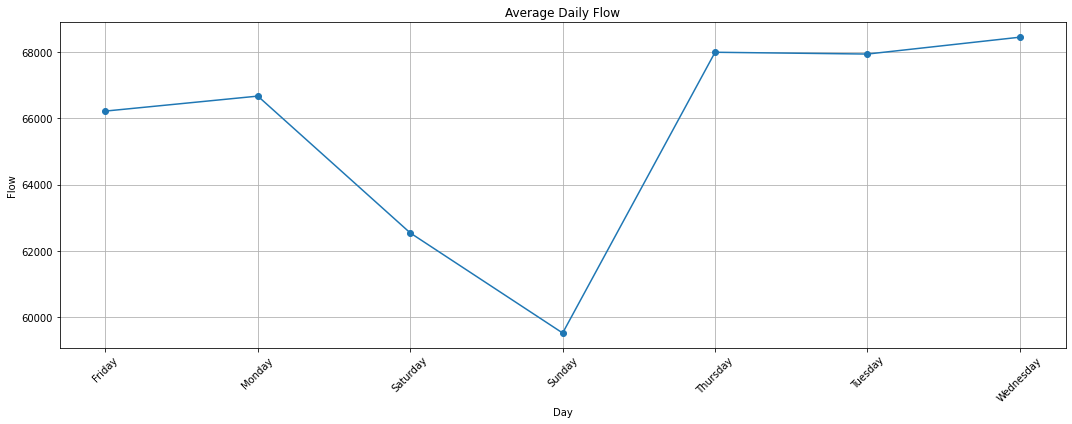

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(df_flow_dl['day'], df_flow_dl['net_mw'], marker='o')
plt.xlabel('Day')
plt.ylabel('Flow')
plt.title('Average Daily Flow')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Weekly

In [22]:
df_flow_wk = df_flow_m.resample('W-SUN', on='date')['net_mw'].sum()
df_flow_wk

date
2023-09-03    165389.777
2023-09-10    434119.421
2023-09-17    413558.891
2023-09-24    419218.310
2023-10-01    432561.086
2023-10-08    454298.237
2023-10-15    491932.067
2023-10-22    533225.908
2023-10-29    495095.675
2023-11-05    495480.560
2023-11-12    502648.421
2023-11-19    501697.786
2023-11-26    517204.176
2023-12-03    568008.342
2023-12-10    556866.419
2023-12-17    525511.185
2023-12-24    497368.789
2023-12-31    462772.381
2024-01-07    510156.921
2024-01-14    566512.336
2024-01-21    573706.641
2024-01-28    529620.216
2024-02-04    524519.831
2024-02-11    540818.490
2024-02-18    515157.993
2024-02-25    500488.329
2024-03-03    532021.055
2024-03-10    512202.127
2024-03-17    498216.397
2024-03-24    488771.920
2024-03-31    458473.668
2024-04-07    445965.365
2024-04-14    453949.172
2024-04-21    448541.649
2024-04-28    437242.597
2024-05-05    418904.131
2024-05-12    390827.297
2024-05-19    412249.592
2024-05-26    374461.299
2024-06-02    398780

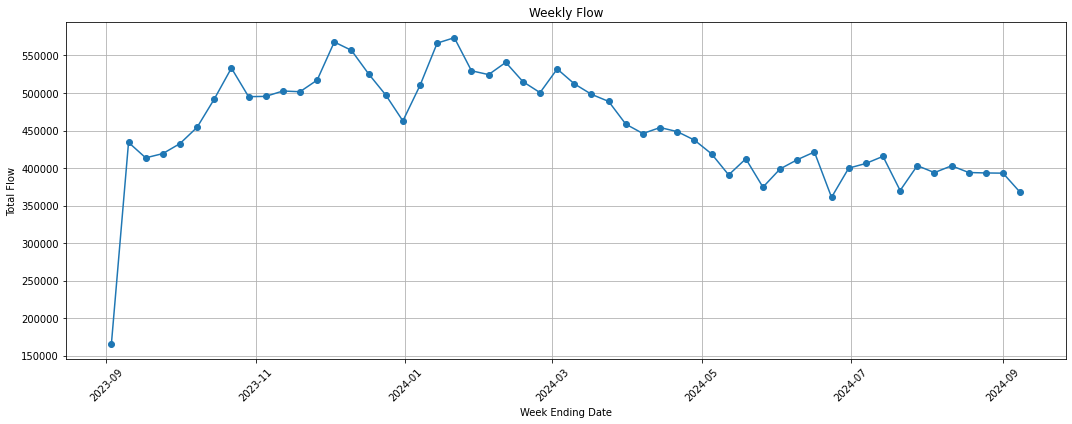

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(df_flow_wk.index, df_flow_wk.values, marker='o')
plt.xlabel('Week Ending Date')
plt.ylabel('Total Flow')
plt.title('Weekly Flow')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly

In [24]:
df_flow_ml = df_flow_m.resample('M', on='date')['net_mw'].sum()
df_flow_ml

date
2023-09-30    1805412.231
2023-10-31    2175051.547
2023-11-30    2203710.090
2023-12-31    2282783.563
2024-01-31    2413748.970
2024-02-29    2155665.485
2024-03-31    2181251.469
2024-04-30    1911825.153
2024-05-31    1760044.256
2024-06-30    1702236.259
2024-07-31    1767171.288
2024-08-31    1751306.006
2024-09-30     421194.832
Freq: M, Name: net_mw, dtype: float64

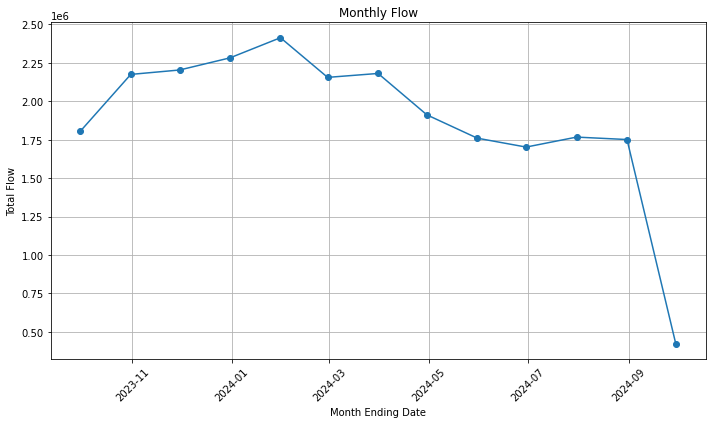

In [25]:
plt.figure(figsize=(10, 6))  # Set plot size
plt.plot(df_flow_ml.index, df_flow_ml.values, marker='o')
plt.xlabel('Month Ending Date')
plt.ylabel('Total Flow')
plt.title('Monthly Flow')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Cluster to find grid group centres

In [26]:
df_gg = pd.concat([df_pri_m[['Substation Name', 'Nominal Voltage (kV)', 'Primary Group','Firm Capacity (MVA)', 'Maximum Load (MVA)','Minimum Load (MVA)', 'Generation Connected (MW)',
       'Generation Contracted (MW)', 'Overall Category','long', 'lat']].rename(columns={'Primary Group':'Grid Group'}), df_grid_m[['Substation Name', 'Nominal Voltage (kV)', 'Grid Group','Firm Capacity (MVA)', 'Maximum Load (MVA)',
       'Minimum Load (MVA)', 'Generation Connected (MW)',
       'Generation Contracted (MW)', 'Overall Category','long', 'lat']]], ignore_index=True)
df_gg

,Substation Name,Nominal Voltage (kV),Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Minimum Load (MVA),Generation Connected (MW),Generation Contracted (MW),Overall Category,long,lat
0,DICKINSONS,33/11,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,14.71,3.68,0.04,0.0,RED,-2.868960,53.479467
1,WAVERTREE,33/11,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,37.5,18.97,4.74,0.00,0.0,RED,-2.920402,53.392115
2,AINTREE,33/11,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,20.0,11.67,2.92,0.00,0.0,AMBER,-2.952121,53.479927
3,WAVERTREE VALE,33/6.3,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,17.5,10.12,2.53,0.00,0.0,RED,-2.934837,53.401313
4,LARK LANE,33/11,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,30.0,20.86,5.21,1.60,0.0,RED,-2.944624,53.384398
...,...,...,...,...,...,...,...,...,...,...,...
262,BURLINGTON STREET,132/33,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,139.0,81.40,20.30,27.00,0.0,AMBER,-2.989788,53.421332
263,GILLMOSS,132/33,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,90.2,52.40,13.10,0.00,20.0,RED,-2.899936,53.464576
264,KIRKBY,132/33,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,90.2,52.40,13.10,0.00,20.0,RED,-2.855142,53.470892
265,SPARLING STREET,132/33,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,138.4,94.50,23.60,7.10,0.0,AMBER,-2.981651,53.401599


In [27]:
for gg in df_gg['Grid Group'].unique():
    df = df_gg.query('`Grid Group` == "' + gg + '"')[['lat', 'long']]
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(df)
    print(f'for grid <{gg}>, center is {kmeans.cluster_centers_}')
    df_gg.loc[df_gg['Grid Group'] == gg, 'lat_group'] = kmeans.cluster_centers_[0][0]
    df_gg.loc[df_gg['Grid Group'] == gg, 'long_group'] = kmeans.cluster_centers_[0][1]
df_gg['distance'] = ((df_gg['lat'] - df_gg['lat_group']) **2 + (df_gg['long'] - df_gg['long_group']) **2) **0.5
df_gg.to_excel('gg.xlsx', index=False)
df_gg

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for grid <ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD T1 / KODAK T1>, center is [[53.48422522 -2.85963901]]
for grid <AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 / MOSSLEY HILL T1 / WAVERTREE T1>, center is [[53.37884544 -2.92054904]]
for grid <AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1>, center is [[53.48221184 -2.94071719]]
for grid <ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1>, center is [[53.39510542 -2.93651794]]
for grid <BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 / MDHB BRUNSWICK DOCK T1>, center is [[53.3895672  -2.95880361]]
for grid <BEDBURN DV T1 / BLUEBELL LA T1 / BROOKBRIDGE T1 / ECCLESTON T1>, center is [[53.42576079 -2.83804918]]
for grid <BEMROSE T1 / CARR LA EAST T1 / LUCAS (FAZAKERLEY) T1 / NORRIS GREEN T1 / WEST DERBY T1>, center is [[53.44818112 -2.92782254]]
for grid <BOOTLE GRID T2 / ORRELL MOUNT T1 / SCARISBRICK AVE T1 / TATTON RD T1>, center is [[53.4660464  -2.98170894]]
for grid <BUCKINGHAM ST T1 / EVERTON RD T1 / SUBURBAN RD T1>, center is [[53.42532

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

for grid <BIBBYS T1 / INLAND REVENUE OFFICES T1 / REGENT RD T1>, center is [[53.44435457 -2.99045638]]
for grid <BICC HUYTON QUARRY T1 / TARBOCK T1 / WHISTON T1>, center is [[53.40982383 -2.82116585]]
for grid <BLUNDELL ST T1 / ROPEWALKS T1 / ST JAMES T1>, center is [[53.40022801 -2.97810114]]
for grid <BLUNDELLSANDS (NORTH) T1 / BLUNDELLSANDS (SOUTH) T1 / CROSBY T1 / KERSHAW AVE T1 / WATERLOO T2>, center is [[53.49046983 -3.02048938]]
for grid <BOOTLE GRID T1 / KELLOGGS T1 / PACIFIC RD T1 / WASHINGTON ST T1 / WATERLOO T1>, center is [[53.46212176 -2.99848507]]
for grid <BROADGREEN T1 / CROXTETH T1 / EAST PRESCOT RD (FINCH LA) T1 / KNOTTY ASH T1 / LEYFIELD RD T1>, center is [[53.42345698 -2.89150782]]
for grid <BURLINGTON AVE T1 / FRESHFIELD T1 / MARSH BROWS T1 / SOUTHPORT RD T1>, center is [[53.56418779 -3.04748617]]
for grid <CABLE ST T1 / GRADWELL ST T2 / OLDHAM PLACE T2>, center is [[53.40657269 -2.97846162]]
for grid <CABLE ST T2 / CROWN COURTS T1 / GRADWELL ST T1>, center is [[53

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

for grid <FORMBY GT2B / SOUTHPORT GT1 / SOUTHPORT GT2>, center is [[53.60119713 -2.9938046 ]]
for grid <GATEACRE GT1 / HUYTON GT1 / KIRKBY GT3 / PRESCOT GT1A>, center is [[53.42858108 -2.8454183 ]]
for grid <HALEWOOD G1B / HALEWOOD G2B / HALEWOOD GT3 / SPEKE GT1A>, center is [[53.35547319 -2.84770652]]
for grid <BOLD G2A / PRESCOT GT1B / WIDNES GT1 / WIDNES GT2>, center is [[53.40681825 -2.75961522]]
for grid <AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2>, center is [[53.4735522 -2.9292385]]
for grid <BOOTLE GT1 / LITHERLAND GT1A>, center is [[53.46865056 -2.99215199]]
for grid <GARSTON GT2 / SPEKE GT3 / WAVERTREE GT1A>, center is [[53.35572594 -2.87797441]]
for grid <GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1>, center is [[53.47595345 -2.87341446]]
for grid <RAVENHEAD G1A1 / ST HELENS GT2B / WINDLE GT1>, center is [[53.45600192 -2.76007201]]
for grid <BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2A>, center is [[53.44468178 -2.74597757]]
for grid <BURLINGTON ST GT2 / LISTER DV B GT1 / PARAD

,Substation Name,Nominal Voltage (kV),Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Minimum Load (MVA),Generation Connected (MW),Generation Contracted (MW),Overall Category,long,lat,lat_group,long_group,distance
0,DICKINSONS,33/11,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,14.71,3.68,0.04,0.0,RED,-2.868960,53.479467,53.484225,-2.859639,0.010465
1,WAVERTREE,33/11,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,37.5,18.97,4.74,0.00,0.0,RED,-2.920402,53.392115,53.378845,-2.920549,0.013271
2,AINTREE,33/11,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,20.0,11.67,2.92,0.00,0.0,AMBER,-2.952121,53.479927,53.482212,-2.940717,0.011630
3,WAVERTREE VALE,33/6.3,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,17.5,10.12,2.53,0.00,0.0,RED,-2.934837,53.401313,53.395105,-2.936518,0.006432
4,LARK LANE,33/11,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,30.0,20.86,5.21,1.60,0.0,RED,-2.944624,53.384398,53.389567,-2.958804,0.015092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,BURLINGTON STREET,132/33,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,139.0,81.40,20.30,27.00,0.0,AMBER,-2.989788,53.421332,53.415844,-2.966814,0.023621
263,GILLMOSS,132/33,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,90.2,52.40,13.10,0.00,20.0,RED,-2.899936,53.464576,53.475953,-2.873414,0.028859
264,KIRKBY,132/33,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,90.2,52.40,13.10,0.00,20.0,RED,-2.855142,53.470892,53.475953,-2.873414,0.018960
265,SPARLING STREET,132/33,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,138.4,94.50,23.60,7.10,0.0,AMBER,-2.981651,53.401599,53.404983,-2.943229,0.038571


# flow - substations
match capacity (MVA) with flow (MW)

In [28]:
def __my_flatten_cols(self, how="_".join, reset_index=True):
    how = (lambda iter: list(iter)[-1]) if how == "last" else how
    self.columns = [how(filter(None, map(str, levels))) for levels in self.columns.values] \
                    if isinstance(self.columns, pd.MultiIndex) else self.columns
    return self.reset_index() if reset_index else self
pd.DataFrame.my_flatten_cols = __my_flatten_cols

df_flow_sub = df_flow_m.groupby('group_name')[['net_mw', 'net_amps', 'net_mvar', 'generation_output_mw', 'underlying_demand_mw']].agg(['mean', 'max'])
df_flow_sub.my_flatten_cols()

,group_name,net_mw_mean,net_mw_max,net_amps_mean,net_amps_max,net_mvar_mean,net_mvar_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
0,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,8.105243,15.288,0.0,0.0,1.432054,4.210,0.000000,0.0,8.105243,15.288
1,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,9.724854,20.424,0.0,0.0,-1.503333,0.166,0.000000,0.0,9.724854,20.424
2,AINSDALE T1 / PINFOLD LA T1,2.467226,5.668,0.0,0.0,-0.229422,0.242,0.000000,0.0,2.467226,5.668
3,AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,26.751864,48.584,0.0,0.0,-5.708227,2.077,0.000000,0.0,26.751864,48.584
4,AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2,30.095884,65.356,0.0,0.0,-5.048644,8.514,0.000000,0.0,30.095884,65.356
...,...,...,...,...,...,...,...,...,...,...,...
86,Paddington Place T1 / Paddington Place T2,0.085609,0.086,0.0,0.0,-0.052753,0.026,0.000000,0.0,0.085609,0.086
87,RAINHILL,183.204562,314.235,0.0,0.0,-79.346309,0.000,-31.569335,-0.0,214.773897,331.875
88,RAVENHEAD G1A1 / ST HELENS GT1 / WINDLE GT1,19.364394,39.394,0.0,0.0,-0.404820,5.213,-11.700000,-11.7,31.064394,51.094
89,ROYAL INSURANCE (NEW QUAY) T1 / ROYAL INSURANC...,0.261790,0.455,0.0,0.0,0.028908,0.164,0.000000,0.0,0.261790,0.455


In [29]:
df_flow_gg = pd.merge(df_gg[['Grid Group', 'lat_group', 'long_group']].drop_duplicates(subset='Grid Group'), df_flow_sub.reset_index(), 'left', left_on='Grid Group', right_on='group_name')
df_flow_gg.to_excel('flow_gg.xlsx', index=False)
df_flow_gg

,Grid Group,lat_group,long_group,group_name,net_mw_mean,net_mw_max,net_amps_mean,net_amps_max,net_mvar_mean,net_mvar_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
0,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,53.484225,-2.859639,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,8.105243,15.288,0.0,0.0,1.432054,4.210,0.000000,0.0,8.105243,15.288
1,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,53.378845,-2.920549,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,9.724854,20.424,0.0,0.0,-1.503333,0.166,0.000000,0.0,9.724854,20.424
2,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,53.482212,-2.940717,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,5.834762,38.009,0.0,0.0,-0.179872,0.884,0.000000,0.0,5.834762,38.009
3,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,53.395105,-2.936518,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,5.486079,11.504,0.0,0.0,-0.070256,0.980,0.000000,0.0,5.486079,11.504
4,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,53.389567,-2.958804,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,10.689578,19.826,0.0,0.0,-0.276175,1.370,0.000000,0.0,10.689578,19.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,53.475953,-2.873414,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,23.085831,42.579,0.0,0.0,-0.479017,5.427,0.000000,0.0,23.085831,42.579
81,RAVENHEAD G1A1 / ST HELENS GT2B / WINDLE GT1,53.456002,-2.760072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2A,53.444682,-2.745978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,53.415844,-2.966814,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,41.910195,90.122,0.0,0.0,-1.737277,4.652,-2.876151,-0.0,44.786346,102.730


## substation not in flow

In [30]:
df_sub_miss = df_flow_gg[df_flow_gg['group_name'].isna()]
df_sub_miss.to_excel('sub_no_flow.xlsx', index=False)
df_sub_miss

,Grid Group,lat_group,long_group,group_name,net_mw_mean,net_mw_max,net_amps_mean,net_amps_max,net_mvar_mean,net_mvar_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
13,DELAMORE ST T1 / KIRKDALE T1 / WALTON T1,53.442105,-2.969258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,CLUBMOOR T1 / DUNLOPS WALTON T1 / WALTON T2,53.447063,-2.954240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,ALMATEX T1 / ST HELENS WWTW T1 / WATERY LA T2 ...,53.448818,-2.721619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,BEECH ST T1 / LISTER DV A T2,53.417429,-2.937336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,ex BIXTETH ST T1 / LITTLEWOODS T1 / PALL MALL T1,53.413223,-2.989460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,BOLD G2A / PRESCOT GT1B / WIDNES GT1 / WIDNES GT2,53.406818,-2.759615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,RAVENHEAD G1A1 / ST HELENS GT2B / WINDLE GT1,53.456002,-2.760072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2A,53.444682,-2.745978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## flow not in substation

In [31]:
df_flow_miss = df_flow_sub.query('group_name not in @df_gg["Grid Group"]').reset_index()
df_flow_miss.to_excel('flow_no_subs.xlsx', index=False)
df_flow_miss

,group_name,net_mw_mean,net_mw_max,net_amps_mean,net_amps_max,net_mvar_mean,net_mvar_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
0,ALMATEX T1 / ST HELENS WWTW T1 / WATERY LA T2,4.126665,8.446,0.0,0.0,0.252083,2.231,0.000000,0.0,4.126665,8.446
1,BEECH ST T1 / LISTER DV B T2,2.129736,3.916,0.0,0.0,0.034056,0.939,0.000000,0.0,2.129736,3.916
2,BOLD G4A / PRESCOT GT1B / WIDNES GT1 / WIDNES GT2,34.138012,93.338,0.0,0.0,-3.045506,34.150,-26.056379,-0.0,60.194391,120.119
3,BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2,28.772834,54.806,0.0,0.0,-0.872431,6.223,-17.600000,-17.6,46.372834,72.406
4,CLUBMOOR T1 / DUNLOPS WALTON T1 / WALTON T1,5.036276,9.313,0.0,0.0,0.978791,4.202,0.000000,0.0,5.036276,9.313
5,DELAMORE ST T1 / KIRKDALE T1 / WALTON T2,5.280043,10.980,0.0,0.0,-0.948930,0.922,0.000000,0.0,5.280043,10.980
6,KIRKBY,127.953069,232.780,0.0,0.0,-52.135940,19.967,-19.375440,-0.0,147.328509,268.069
7,LISTER DRIVE,171.690854,290.559,0.0,0.0,-100.697584,0.000,-7.157964,-0.0,178.848818,309.919
8,LITHERLAND GRID B / NORTH SEAFORTH,1.699411,5.365,0.0,0.0,-0.570960,3.485,0.000000,0.0,1.699411,5.365
9,PALL MALL T1 / LITTLEWOODS T1,2.430352,4.239,0.0,0.0,-0.182730,0.937,0.000000,0.0,2.430352,4.239


# Greedy
## put flow into substation from closest until ful then next substation

In [32]:
df_greed = pd.DataFrame({'sub_name':[], 'group_name':[], 'cap_mva':[], 'distance':[], 'mean_flow_mw':[], 'max_flow_mw':[], 'mean_flow_group':[], 'max_flow_group':[], 'lat':[], 'long':[]})
for ff in df_flow_gg.index:
    mw = df_flow_gg['net_mw_mean'][ff]
    max_mw = df_flow_gg['underlying_demand_mw_max'][ff]
    while mw > 0 or max_mw > 0:
        for ss in df_gg.query('`Grid Group` == @df_flow_gg.group_name.loc[@ff]').sort_values('distance').index:
            cap = df_gg['Firm Capacity (MVA)'][ss]
            if mw > cap:
                flowin = cap
            else:
                flowin = mw
            if max_mw > cap:
                max_flowin = cap
            else:
                max_flowin = max_mw
            df_greed.loc[len(df_greed)] = [df_gg['Substation Name'][ss], df_gg['Grid Group'][ss], cap, df_gg['distance'][ss], flowin, max_flowin, df_flow_gg['net_mw_mean'][ff], df_flow_gg['underlying_demand_mw_max'][ff], df_gg['lat'][ss], df_gg['long'][ss]]
            mw -= flowin
            max_mw -= max_flowin
df_greed.to_excel('greed.xlsx', index=False)
df_greed

,sub_name,group_name,cap_mva,distance,mean_flow_mw,max_flow_mw,mean_flow_group,max_flow_group,lat,long
0,ACORNFIELD ROAD,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.004113,8.105243,15.288,8.105243,15.288,53.481581,-2.856489
1,KODAK,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.005469,0.000000,0.000,8.105243,15.288,53.485770,-2.854392
2,HAMMOND ROAD,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.005930,0.000000,0.000,8.105243,15.288,53.490083,-2.858715
3,DICKINSONS,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.010465,0.000000,0.000,8.105243,15.288,53.479467,-2.868960
4,MOSSLEY HILL,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,37.5,0.002946,9.724854,20.424,9.724854,20.424,53.377592,-2.923215
...,...,...,...,...,...,...,...,...,...,...
240,BURLINGTON STREET,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,139.0,0.023621,0.000000,0.000,41.910195,102.730,53.421332,-2.989788
241,LISTER DRIVE,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,139.0,0.038841,0.000000,0.000,41.910195,102.730,53.421296,-2.928358
242,LISTER DRIVE,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,138.4,0.022074,51.416799,96.574,51.416799,96.574,53.421296,-2.928358
243,WAVERTREE,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,138.4,0.026866,0.000000,0.000,51.416799,96.574,53.392054,-2.919679


In [33]:
import plotly.express as px

fig = px.density_mapbox(df_greed, lat='lat', lon='long', z='mean_flow_mw', radius=10,
                        center=dict(lat=53.5, lon=-2.9), zoom=8, hover_name='sub_name', custom_data=['cap_mva', 'distance'],
                        mapbox_style="open-street-map")
fig.show()

# Clustering
cluster groups of substations with flow

In [34]:
clust_x = df_flow_gg[['net_mvar_max', 'Firm Capacity (MVA)']].dropna()
clust_x

KeyError: "['Firm Capacity (MVA)'] not in index"

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

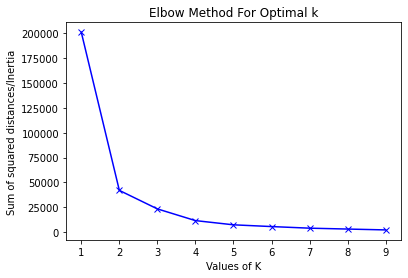

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
   kmeans = KMeans(n_clusters=num_clusters)
   kmeans.fit(clust_x)
   Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='net_mvar_max', ylabel='Firm Capacity (MVA)'>

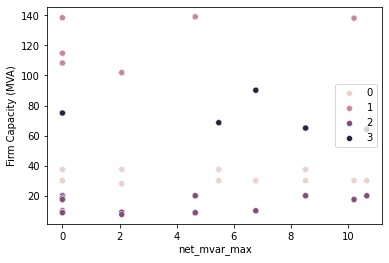

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(clust_x)
sns.scatterplot(data = clust_x, x = 'net_mvar_max', y = 'Firm Capacity (MVA)', hue = kmeans.labels_)